# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h) 

by Clément Bouvier 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("data/Life_Expectancy_Data.csv")

df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Longitude                        2938 non-null   float64
 2   Latitude                         2938 non-null   float64
 3   Continent                        2938 non-null   object 
 4   Year                             2938 non-null   int64  
 5   Status                           2938 non-null   object 
 6   Life_expectancy                  2928 non-null   float64
 7   Adult_mortality                  2928 non-null   float64
 8   Infant_deaths                    2938 non-null   int64  
 9   Alcohol                          2744 non-null   float64
 10  Percentage_expenditure           2938 non-null   float64
 11  Hepatitis_B                      2385 non-null   float64
 12  Measles             

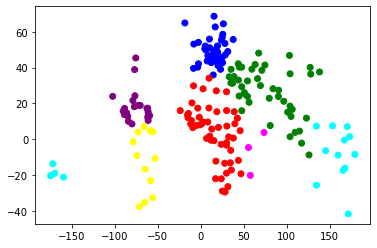

In [206]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()

**QUESTION 1**

Identify each class with the plot colors.

What do the coordinates correspond to?

The coordinates are Longitude and Latitude

**TO DO 1.2**

Execute the following cell


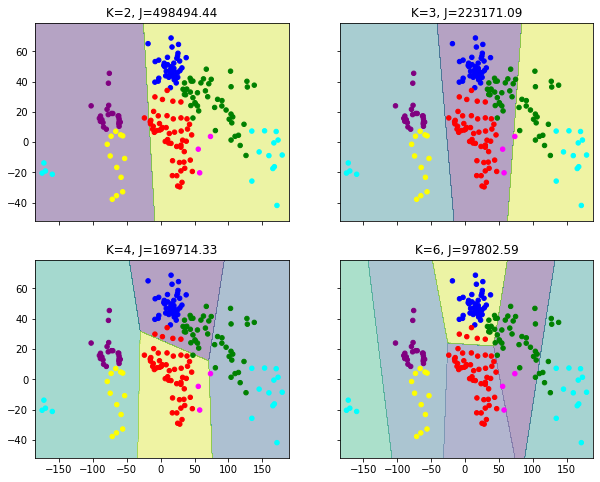

In [207]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

Which is the main problem with the mercator representation for continent detection?

With a low inertia we have a smaller distance in each cluster (from centroid to sample) so low Inertia is a good point. We can use the silhouette score instead


the main problem with the mercator representation is that it doesn't keep the distance right; this projection is for navigation because it keep the angles but it's not for continent clustering.

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

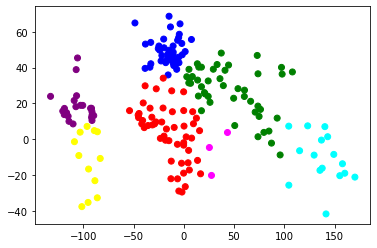

In [208]:
np2=np1.copy()
for i in range(len(np2[:,0])):
    np2[i,0]=np2[i,0]-30
    if np2[i,0]<-180:
        np2[i,0]=np2[i,0]+360

plt.scatter(np2[:,0], np2[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


**QUESTION 3**

What are the advantages of this normalization?

every country of Oceania are in the same side of the figure 

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

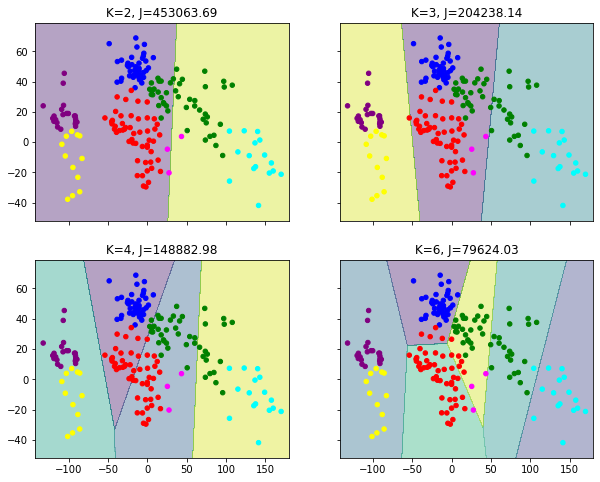

In [209]:
x_min, x_max = np2[:, 0].min() - 10, np2[:, 0].max() + 10
y_min, y_max = np2[:, 1].min() - 10, np2[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

My_km2 = cluster.KMeans(n_clusters=2).fit(np2)
My_km3 = cluster.KMeans(n_clusters=3).fit(np2)
My_km4 = cluster.KMeans(n_clusters=4).fit(np2)
My_km6 = cluster.KMeans(n_clusters=6).fit(np2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [My_km2, My_km3, My_km4, My_km6],
                        ["K=2, J=%.2f" % My_km2.inertia_,
                         "K=3, J=%.2f" % My_km3.inertia_, 
                         "K=4, J=%.2f" % My_km4.inertia_, 
                         "K=6, J=%.2f" % My_km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np2[:, 0], np2[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

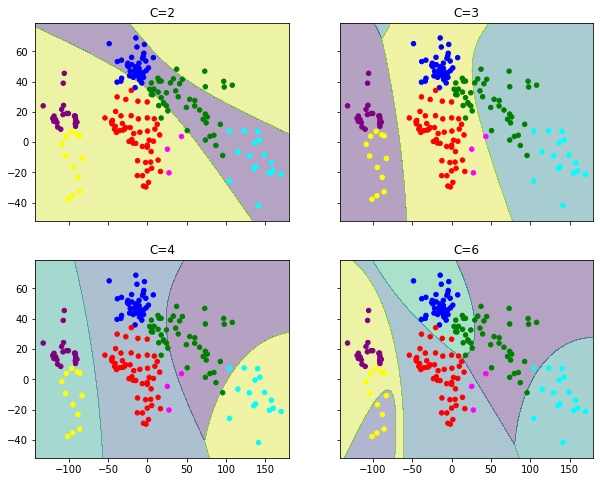

In [210]:
from sklearn.mixture import GaussianMixture

x_min, x_max = np2[:, 0].min() - 10, np2[:, 0].max() + 10
y_min, y_max = np2[:, 1].min() - 10, np2[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

My_gmm2 = GaussianMixture(n_components=2).fit(np2)
My_gmm3 = GaussianMixture(n_components=3).fit(np2)
My_gmm4 = GaussianMixture(n_components=4).fit(np2)
My_gmm6 = GaussianMixture(n_components=6).fit(np2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [My_gmm2, My_gmm3, My_gmm4, My_gmm6],
                        ["C=2",
                         "C=3", 
                         "C=4", 
                         "C=6"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np2[:, 0], np2[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

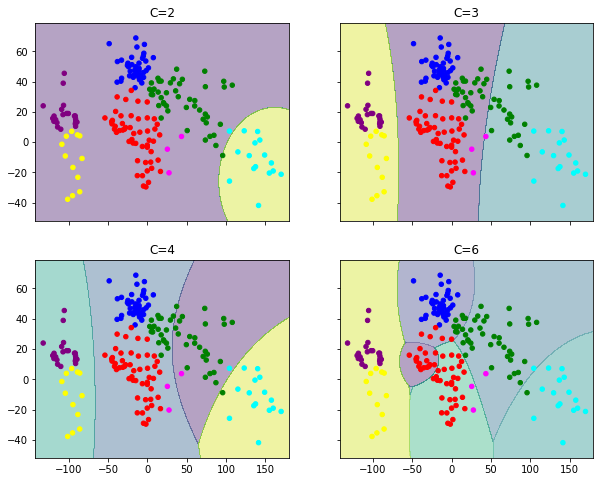

In [211]:
x_min, x_max = np2[:, 0].min() - 10, np2[:, 0].max() + 10
y_min, y_max = np2[:, 1].min() - 10, np2[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

My_gmm2 = GaussianMixture(n_components=2,covariance_type='diag').fit(np2)
My_gmm3 = GaussianMixture(n_components=3,covariance_type='diag').fit(np2)
My_gmm4 = GaussianMixture(n_components=4,covariance_type='diag').fit(np2)
My_gmm6 = GaussianMixture(n_components=6,covariance_type='diag').fit(np2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [My_gmm2, My_gmm3, My_gmm4, My_gmm6],
                        ["C=2",
                         "C=3", 
                         "C=4", 
                         "C=6"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np2[:, 0], np2[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

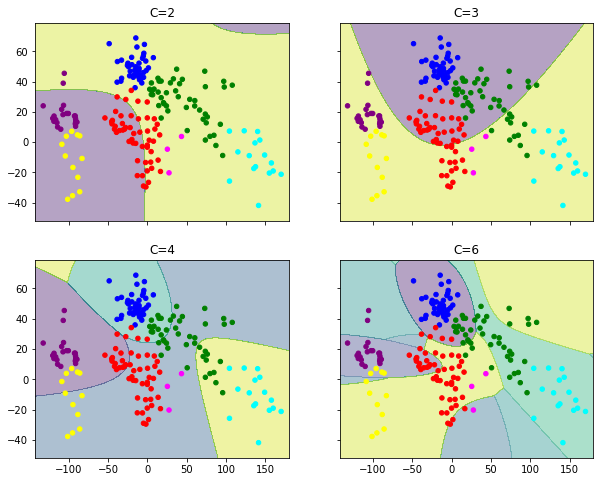

In [226]:
x_min, x_max = np2[:, 0].min() - 10, np2[:, 0].max() + 10
y_min, y_max = np2[:, 1].min() - 10, np2[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

My_gmm2 = GaussianMixture(n_components=2,init_params='random').fit(np2)
My_gmm3 = GaussianMixture(n_components=3,init_params='random').fit(np2)
My_gmm4 = GaussianMixture(n_components=4,init_params='random').fit(np2)
My_gmm6 = GaussianMixture(n_components=6,init_params='random').fit(np2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [My_gmm2, My_gmm3, My_gmm4, My_gmm6],
                        ["C=2",
                         "C=3", 
                         "C=4", 
                         "C=6"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np2[:, 0], np2[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**QUESTION 4**

Which is the best method to detect continents?

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

Visually, gaussian mmixture without random initialization seems to be the best

In [213]:
My_gmm6 = GaussianMixture(n_components=6,covariance_type='diag').fit(np2)
print(My_gmm6.predict_proba([[-50, -40]]).mean(), " is the probability to have a country at [-50,-40] ")


0.16666666666666685  is the probability to have a country at [-50,-40] 


to detect unpopulated oceans we can take areas with a predict proba lower than a threshold 

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

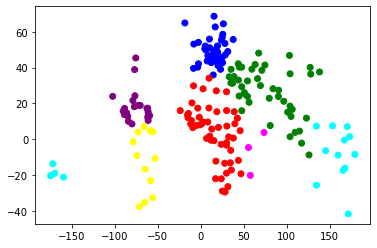

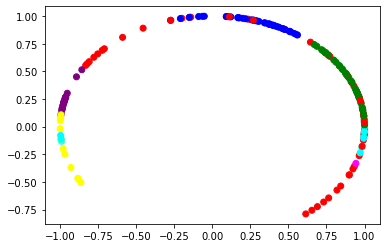

In [214]:
df_Xcos = df1[['Longitude', 'Latitude']]

np_Y

np1cos = df_Xcos.to_numpy()
plt.figure()
plt.scatter(np1cos[:,0], np1cos[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()
for i in np1cos:
    norm=np.sqrt(i[0]**2+i[1]**2)
    i[0]=i[0]/norm
    i[1]=i[1]/norm

plt.figure()
plt.scatter(np1cos[:,0], np1cos[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()



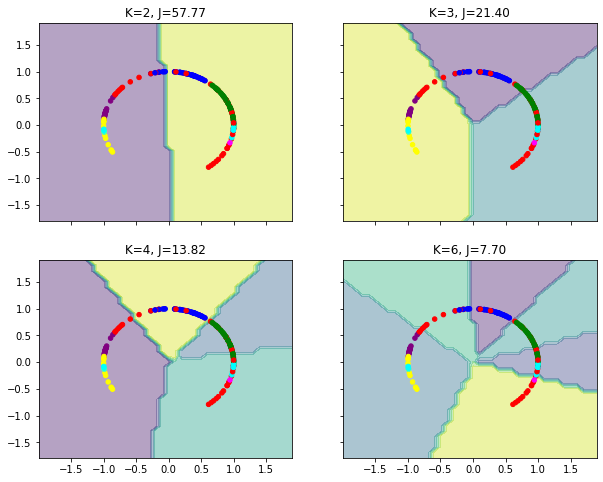

In [215]:
x_min, x_max = np1cos[:, 0].min() - 1, np1cos[:, 0].max() + 1
y_min, y_max = np1cos[:, 1].min() - 1, np1cos[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

My_km2 = cluster.KMeans(n_clusters=2).fit(np1cos)
My_km3 = cluster.KMeans(n_clusters=3).fit(np1cos)
My_km4 = cluster.KMeans(n_clusters=4).fit(np1cos)
My_km6 = cluster.KMeans(n_clusters=6).fit(np1cos)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [My_km2, My_km3, My_km4, My_km6],
                        ["K=2, J=%.2f" % My_km2.inertia_,
                         "K=3, J=%.2f" % My_km3.inertia_, 
                         "K=4, J=%.2f" % My_km4.inertia_, 
                         "K=6, J=%.2f" % My_km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1cos[:, 0], np1cos[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

0.0  with K =  1  and homogeneity_score/K =  0.0
0.19972951026980534  with K =  2  and homogeneity_score/K =  0.09986475513490267
0.3781298445492956  with K =  3  and homogeneity_score/K =  0.12604328151643188
0.5024558441840108  with K =  4  and homogeneity_score/K =  0.1256139610460027
0.5538186651278874  with K =  5  and homogeneity_score/K =  0.11076373302557747
0.5640544679738339  with K =  6  and homogeneity_score/K =  0.09400907799563897
0.5734543300681568  with K =  7  and homogeneity_score/K =  0.08192204715259384
0.623482807728774  with K =  8  and homogeneity_score/K =  0.07793535096609674
0.6386604171354322  with K =  9  and homogeneity_score/K =  0.07096226857060357


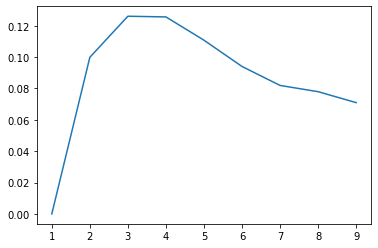

3

In [216]:
from sklearn.metrics import homogeneity_score
L=[2,3,4,6]
L=[i for i in range(1,10)]
y_L=[]

for K in L:
    hom=homogeneity_score(np_Y,cluster.KMeans(n_clusters=K, random_state=10).fit_predict(np1cos))
    y_L.append(hom/K)
    print(hom,' with K = ',K,' and homogeneity_score/K = ',y_L[-1])

plt.figure()
plt.plot(L,y_L)
plt.show()
L[y_L.index(max(y_L))]

A et b deux points, 

distance euclidienne=$\sqrt{(A-B)^t(A-B)}=(A^tA-2A^tB+B^tB)=2*(1-\frac{A^tB}{||A||.||B||}) <=>$ A et B de norme 1

distance cosinus = $1-\frac{A^tB}{||A||.||B||}$

il faut tout normaliser et refaire une prédiction

## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

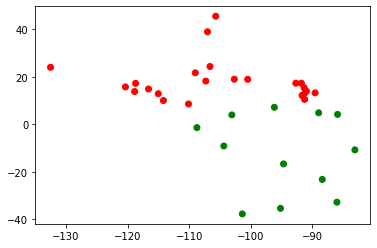

In [217]:
df_Status = df1[['Continent']]
df_Status1 = df_Status[(df_Status.Continent=='North America') | (df_Status.Continent=='South America')]

df_Y2 = df_Status1.replace(['North America', 'South America'], [0, 1])


np_Y2 = df_Y2.to_numpy()
np_Y2 = np_Y2.reshape((np_Y2.shape[0],))

np_name=df1.Country[(df1['Continent']=='North America')| (df1['Continent']=='South America')].to_numpy()
np_name

np3=np2.copy()
np3=np3[np3[:,0]<-55]

plt.scatter(np3[:,0], np3[:,1], c=np_Y2, cmap=matplotlib.colors.ListedColormap(['red', 'green']))

plt.show()

**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.



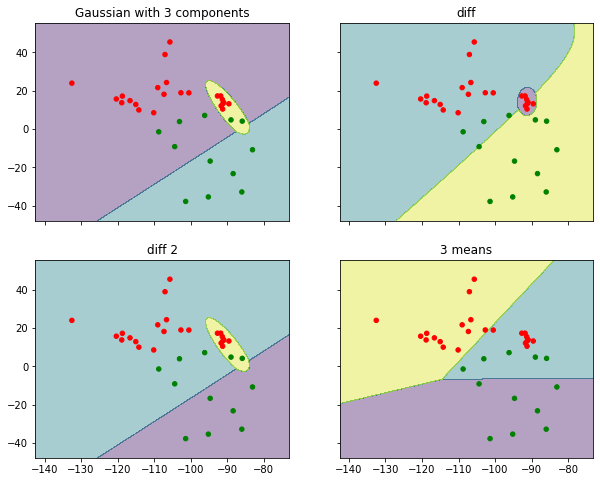

In [227]:
MyNew_gmm3 = GaussianMixture(n_components=3).fit(np3)
MyNew_km3 = cluster.KMeans(n_clusters=3).fit(np3)
MyNew_gmm3_diff = GaussianMixture(n_components=3,covariance_type="diag").fit(np3)
MyNew_gmm3_diff2 = GaussianMixture(n_components=3,max_iter=1000).fit(np3)



x_min, x_max = np3[:, 0].min() - 10, np3[:, 0].max() + 10
y_min, y_max = np3[:, 1].min() - 10, np3[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, method, tt in zip(product([0, 1], [0,1]),
                        [MyNew_gmm3,MyNew_gmm3_diff,MyNew_gmm3_diff2, MyNew_km3 ],
                        ["Gaussian with 3 components",
                        "diff",
                        'diff 2',
                         "3 means"]):

    Z = method.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np3[:, 0], np3[:, 1], c=np_Y2,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()




3 components of a gaussian mixture and hope for the best, the initials center are importants

**QUESTION 5**

Which is the outlier of this clustering problem?

Mexico is alone at the left of the figure so it doesn't help to have a good cluster of north and south america

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

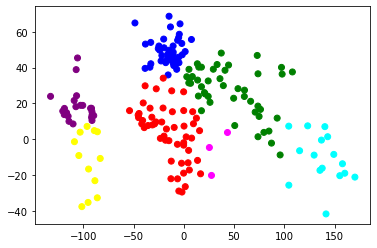

In [219]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
for i in range(len(np1[:,0])):
    np1[i,0]=np1[i,0]-30
    if np1[i,0]<-180:
        np1[i,0]=np1[i,0]+360

plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [220]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5606777583656894


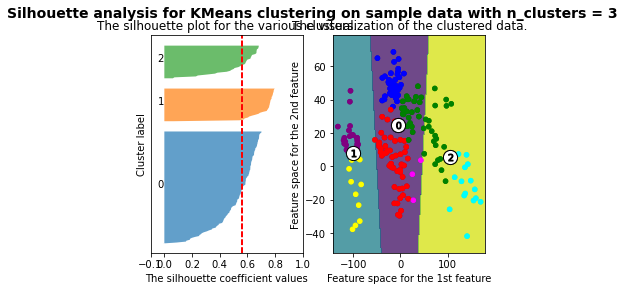

In [221]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

For n_clusters = 2 The average silhouette_score is : 0.5138751158850031


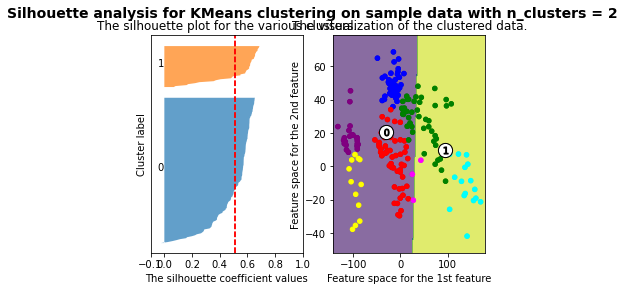

For n_clusters = 3 The average silhouette_score is : 0.5606777583656894


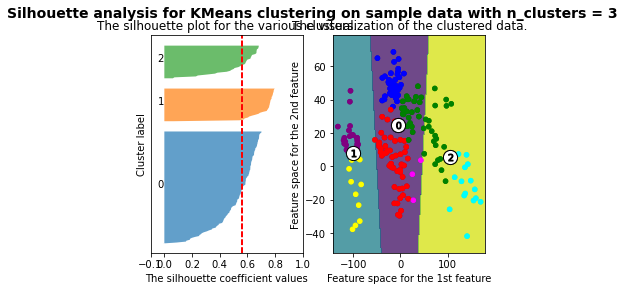

For n_clusters = 4 The average silhouette_score is : 0.44464926591415543


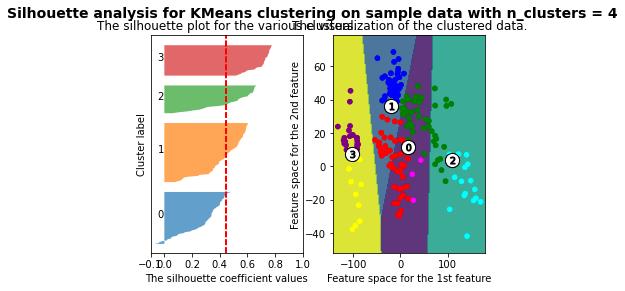

For n_clusters = 6 The average silhouette_score is : 0.4883035076641584


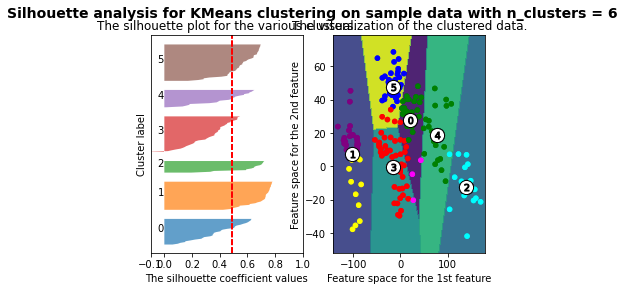

In [222]:
from sklearn.metrics import silhouette_samples, silhouette_score


L=[2,3,4,6]
for K in L:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

For K=3 the silhouette plot of every cluster stay thick and the coefficients and score are high comparing to the other clustering

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

In [223]:
print(" Gaussian mixture: default parameters ")
for K in [2,3,4,6]:
    gmm_bonus = GaussianMixture(n_components=K, random_state=10)
    cluster_labels = gmm_bonus.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_components =", K, "The average silhouette_score is :", silhouette_avg)

print(" Gaussian mixture: random init params ")
for K in [2,3,4,6]:
    gmm_bonus = GaussianMixture(n_components=K, random_state=10,init_params='random')
    cluster_labels = gmm_bonus.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_components =", K, "The average silhouette_score is :", silhouette_avg)


print(" Gaussian mixture: diagonal covariance ")
for K in [2,3,4,6]:
    gmm_bonus = GaussianMixture(n_components=K, random_state=10,covariance_type='diag')
    cluster_labels = gmm_bonus.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_components =", K, "The average silhouette_score is :", silhouette_avg)



 Gaussian mixture: default parameters 
For n_components = 2 The average silhouette_score is : 0.44538856470921145
For n_components = 3 The average silhouette_score is : 0.5415299502146015
For n_components = 4 The average silhouette_score is : 0.473059457921089
For n_components = 6 The average silhouette_score is : 0.4789947119088048
 Gaussian mixture: random init params 
For n_components = 2 The average silhouette_score is : 0.3001100797121582
For n_components = 3 The average silhouette_score is : 0.1858738895188354
For n_components = 4 The average silhouette_score is : 0.07920463216880569
For n_components = 6 The average silhouette_score is : 0.2951726303409956
 Gaussian mixture: diagonal covariance 
For n_components = 2 The average silhouette_score is : 0.4196685937009565
For n_components = 3 The average silhouette_score is : 0.5624403462258074
For n_components = 4 The average silhouette_score is : 0.4808465748956634
For n_components = 6 The average silhouette_score is : 0.4729680180

K=3 seems better also here 

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

0.0  with K =  1  and homogeneity_score/K =  0.0
0.20757461254671206  with K =  2  and homogeneity_score/K =  0.10378730627335603
0.4242395954581875  with K =  3  and homogeneity_score/K =  0.1414131984860625
0.557115346706902  with K =  4  and homogeneity_score/K =  0.1392788366767255
0.7097933347615367  with K =  5  and homogeneity_score/K =  0.14195866695230736
0.8018497952345173  with K =  6  and homogeneity_score/K =  0.1336416325390862
0.8273203706339503  with K =  7  and homogeneity_score/K =  0.11818862437627861
0.8546863953579821  with K =  8  and homogeneity_score/K =  0.10683579941974776
0.8565337252352186  with K =  9  and homogeneity_score/K =  0.09517041391502429


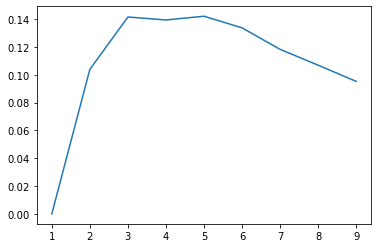

5

In [224]:
from sklearn.metrics import homogeneity_score
L=[2,3,4,6]
L=[i for i in range(1,10)]
y_L=[]

for K in L:
    hom=homogeneity_score(np_Y,cluster.KMeans(n_clusters=K, random_state=10).fit_predict(np1))
    y_L.append(hom/K)
    print(hom,' with K = ',K,' and homogeneity_score/K = ',y_L[-1])

plt.figure()
plt.plot(L,y_L)
plt.show()
L[y_L.index(max(y_L))]

**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

K=5 seems to be the best

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

[1, 2, 3, 4, 5, 6, 7, 8, 9]
0.0  with K =  1  and homogeneity_score/K =  0.0
0.22619082558352135  with K =  2  and homogeneity_score/K =  0.11309541279176068
0.4606785102944939  with K =  3  and homogeneity_score/K =  0.15355950343149796
0.6523190325996149  with K =  4  and homogeneity_score/K =  0.16307975814990372
0.720730638302633  with K =  5  and homogeneity_score/K =  0.1441461276605266
0.7894302006770175  with K =  6  and homogeneity_score/K =  0.13157170011283625
0.7367138363181184  with K =  7  and homogeneity_score/K =  0.10524483375973119
0.7956133190965526  with K =  8  and homogeneity_score/K =  0.09945166488706908
0.8188393849618515  with K =  9  and homogeneity_score/K =  0.09098215388465017
[0.0, 0.11309541279176068, 0.15355950343149796, 0.16307975814990372, 0.1441461276605266, 0.13157170011283625, 0.10524483375973119, 0.09945166488706908, 0.09098215388465017]


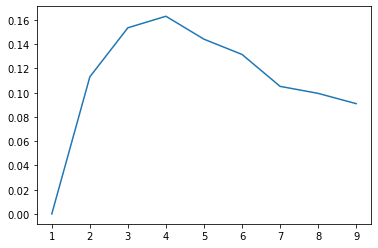

4

In [225]:
from sklearn.metrics import homogeneity_score
L=[2,3,4,6,10]
L=[i for i in range(1,10)]
y_L=[]
print(L)
for K in L:
    hom=homogeneity_score(np_Y,GaussianMixture(n_components=K, random_state=10).fit_predict(np1))
    y_L.append(hom/K)
    print(hom,' with K = ',K,' and homogeneity_score/K = ',y_L[-1])
print(y_L)
plt.figure()
plt.plot(L,y_L)
plt.show()

L[y_L.index(max(y_L))]

K=4 seems to be the best 

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?